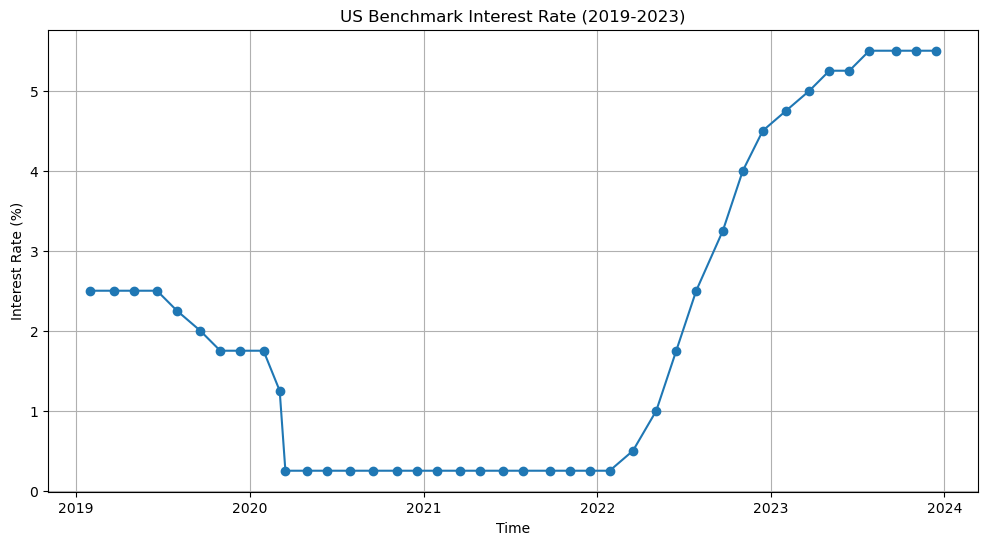

ADF Statistic: -2.186131254262289
p-value: 0.21131746149664032
                               SARIMAX Results                                
Dep. Variable:                  기준 금리   No. Observations:                   41
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   4.068
Date:                Thu, 29 Aug 2024   AIC                             -2.137
Time:                        16:01:26   BIC                              2.930
Sample:                             0   HQIC                            -0.305
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7183      0.138      5.220      0.000       0.449       0.988
ma.L1          0.0666      0.181      0.369      0.712      -0.287  

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A d

                               SARIMAX Results                                
Dep. Variable:            차분된_기준금리_2차   No. Observations:                   39
Model:                 ARIMA(1, 0, 1)   Log Likelihood                   3.633
Date:                Thu, 29 Aug 2024   AIC                              0.733
Time:                        16:01:27   BIC                              7.387
Sample:                             0   HQIC                             3.121
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.016      0.660      0.509      -0.021       0.043
ar.L1          0.6960      0.324      2.145      0.032       0.060       1.332
ma.L1         -0.9998     72.291     -0.014      0.9

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [6]:
# 2019 ~ 2023년도 미국 기준 금리 시각화 및 시계열 분석  예측 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
# 데이터 로드 (예시: 'data.csv' 파일에서)
data = pd.read_csv("./data_csv/US benchmark interest rate_2019_2023.csv", index_col = 0)
#print(data)
# 날짜 열을 datetime으로 변환 (날짜 형식은 자동 인식되도록 함)
data['날짜'] = pd.to_datetime(data['날짜'])
# 기준금리 열의 백분율(%) 기호 제거 및 실수형으로 변환
data['기준 금리'] = data['기준 금리'].str.replace('%', '').astype(float)

# 월별 기준 금리 시계열 데이터로 설정 
data.set_index('날짜', inplace=True)

# # 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data['기준 금리'], marker='o')
plt.title('US Benchmark Interest Rate (2019-2023)')
plt.xlabel('Time')
plt.ylabel('Interest Rate (%)')
plt.grid()
plt.show()

# ADF 검정으로 정상성 확인
adf_result = adfuller(data['기준 금리'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
# ARIMA 모델 적합
model = ARIMA(data['기준 금리'], order=(1, 1, 1))  # (p, d, q) 값은 데이터에 따라 조정 필요
model_fit = model.fit()

# ARIMA 모델 적합
model = ARIMA(data['기준 금리'], order=(1, 1, 1))  # (p, d, q) 값은 데이터에 따라 조정 필요
model_fit = model.fit()

# 모델 요약
print(model_fit.summary())

# 예측
forecast = model_fit.forecast(steps=4)  # 다음 4개월 예측
print('다음 4개월 기준 금리 예측:', forecast)

# 1차 차분 수행
data['차분된_기준금리'] = data['기준 금리'].diff().dropna()

# 1차 차분된 데이터에 대해 ADF 검정 수행
adf_result_diff = adfuller(data['차분된_기준금리'].dropna())
print('1차 차분 후 ADF Statistic:', adf_result_diff[0])
print('1차 차분 후 p-value:', adf_result_diff[1])

# 2차 차분 수행
data['차분된_기준금리_2차'] = data['차분된_기준금리'].diff().dropna()

# 2차 차분된 데이터에 대해 ADF 검정 수행
adf_result_diff_2 = adfuller(data['차분된_기준금리_2차'].dropna())
print('2차 차분 후 ADF Statistic:', adf_result_diff_2[0])
print('2차 차분 후 p-value:', adf_result_diff_2[1])

# ARIMA 모델 적합 (2차 차분된 데이터 사용)
model_2 = ARIMA(data['차분된_기준금리_2차'].dropna(), order=(1, 0, 1))  # (p, d, q) 값 조정
model_fit_2 = model_2.fit()

# 모델 요약
print(model_fit_2.summary())

# 예측 (2차 차분된 데이터로 예측한 후 원래 데이터로 변환)
forecast_diff_2 = model_fit_2.forecast(steps=4)
forecast_2 = data['기준 금리'].iloc[-1] + forecast_diff_2.cumsum()  # 마지막 관측치에 차분된 예측값을 더함
print('다음 4개월 기준 금리 예측 (2차 차분):', forecast_2)